MACHINE LEARNING PROJECT ADULT

Name: Soofiya Sudheer
Organization: Entri Elavate
Date:30/01/2025

Introduction
The Adult Dataset, also referred to as the "Census Income Dataset", is a widely used dataset in data science and machine learning, especially for tasks related to classification and regression. It originates from the UCI Machine Learning Repository and contains information about individuals from the 1994 U.S. Census. The primary objective of this dataset is to predict whether an individual earns more than $50,000 per year based on their attributes.

Data Description
Source: UCI Machine Learning Repository

Number of Instances: 32561

Number of Features: 15

Target Variable: income

Attributes:
Age: Continuous numeric value

Workclass: Type of employment (e.g., Private, Self-emp-not-inc, Federal-gov)>

Fnlwgt: Final weight, a calculated measure based on the sampling process.

Education: Education level (e.g., Bachelors, HS-grad).

Education-num: Number of years of education (numeric representation of education).

Marital-status: Marital status (e.g., Married-civ-spouse, Never-married).

Occupation: Type of job (e.g., Tech-support, Craft-repair).
Race: Race (e.g., White, Black).

Sex: Gender (e.g., Male, Female).

Capital-gain: Income from capital gains (continuous numeric value).

Capital-loss: Loss from capital (continuous numeric value)

Hours-per-week: Hours worked per week (e.g., 40, 50).

Native-country: Country of origin (e.g., United States, Mexico).

DATA FORMAT
The dataset is often provided as a .csv file.

It includes both categorical and numerical data.

Challenges:
Handling imbalanced data

Addressing missing values, as some entries are marked with ? for categorical attributes.

Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore") 

In [7]:
from sklearn.preprocessing import PowerTransformer,StandardScaler, LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [10]:
from sklearn.preprocessing import PowerTransformer,StandardScaler, LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [12]:
from scipy.stats import skew,kurtosis
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
data=pd.read_csv("adult.data.csv")

In [18]:
df=pd.DataFrame(data)
df.head()

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
data.info

<bound method DataFrame.info of        Age         Work Class  fnlwgt    Education  Education num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital status          Occupation     Relationsip    Race  \
0            Never-married        Adm-clerical   Not-in-family   

In [22]:
df.tail()

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country,Income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [24]:
df.describe()

,Age,fnlwgt,Education num,Capital gain,Capital loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
df.columns

Index(['Age', 'Work Class', 'fnlwgt', 'Education', 'Education num',
       'Marital status', 'Occupation', 'Relationsip', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Hours per week', 'Native Country',
       'Income'],
      dtype='object')

In [28]:
df.duplicated().sum()

24

In [32]:
# Data Cleaning
# Replace "?" with NaN
data.replace('?', np.nan, inplace=True)

In [34]:
# Drop rows with missing values
data.dropna(inplace=True)

In [36]:
df.isnull().sum()

Age               0
Work Class        0
fnlwgt            0
Education         0
Education num     0
Marital status    0
Occupation        0
Relationsip       0
Race              0
Sex               0
Capital gain      0
Capital loss      0
Hours per week    0
Native Country    0
Income            0
dtype: int64

In [38]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [42]:
df.duplicated().sum()

24

In [44]:
df.shape

(32561, 15)

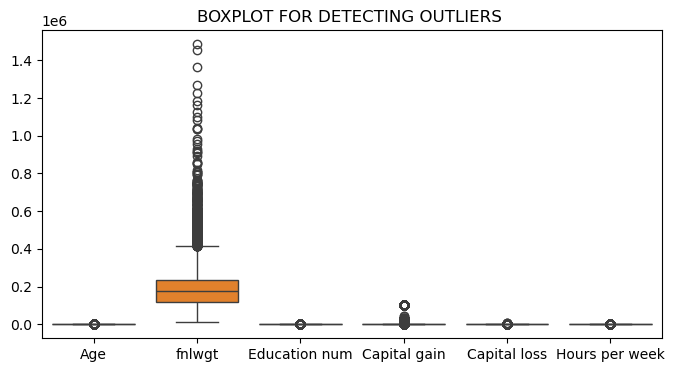

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.title('BOXPLOT FOR DETECTING OUTLIERS ')
plt.show()

In [48]:
def handling_outliers(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a Pandas DataFrame")

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        # Example logic to handle outliers (replace with your logic)
        df[col] = df[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)
    return df

# Call the function
df1 = handling_outliers(data)
print(df1)

       Age         Work Class  fnlwgt    Education  Education num  \
0       39          State-gov   77516    Bachelors           13.0   
1       50   Self-emp-not-inc   83311    Bachelors           13.0   
2       38            Private  215646      HS-grad            9.0   
3       53            Private  234721         11th            7.0   
4       28            Private  338409    Bachelors           13.0   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm           12.0   
32557   40            Private  154374      HS-grad            9.0   
32558   58            Private  151910      HS-grad            9.0   
32559   22            Private  201490      HS-grad            9.0   
32560   52       Self-emp-inc  287927      HS-grad            9.0   

            Marital status          Occupation     Relationsip    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [50]:
df1 = handling_outliers(df)
df1.head()

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [52]:
df1.shape

(32561, 15)

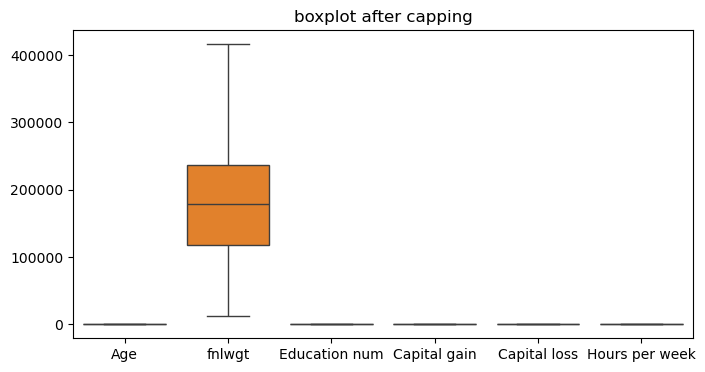

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(df1)
plt.title('boxplot after capping')
plt.show()

In [56]:
df1.shape

(32561, 15)

In [ ]:
# HISTPLOT

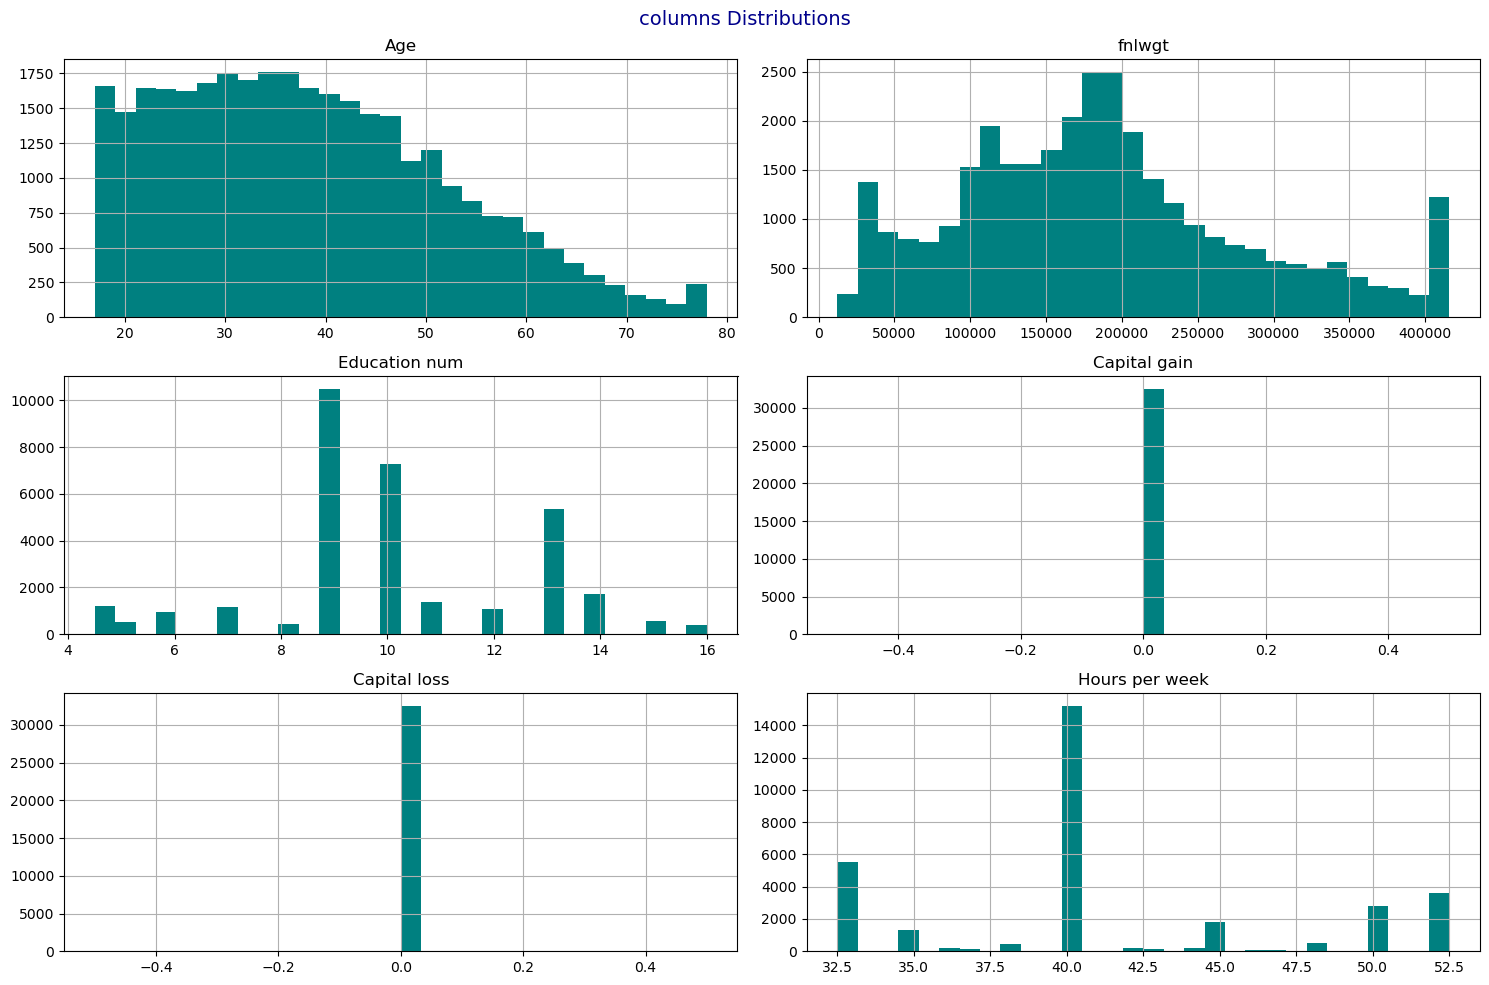

In [58]:
df1.hist(bins = 30,figsize = (15,10),color = 'teal')
plt.suptitle("columns Distributions",fontsize = 14,color = 'Darkblue')
plt.tight_layout()
plt.show()

In [68]:
numerical_columns = ['Age', 'fnlwgt', 'Education num', 'Capital gain', 'Capital loss', 'Hours per week']
from scipy.stats import skew

for col in numerical_columns:
    skewness_value = skew(data[col].dropna()) 
    
    # Drop NaN values for accurate calculation
    
    print(f'Skewness of {col}: {skewness_value:.4f}')

Skewness of Age: 0.5587
Skewness of fnlwgt: 1.4469
Skewness of Education num: -0.3117
Skewness of Capital gain: 11.9533
Skewness of Capital loss: 4.5944
Skewness of Hours per week: 0.2276


<Axes: ylabel='Count'>

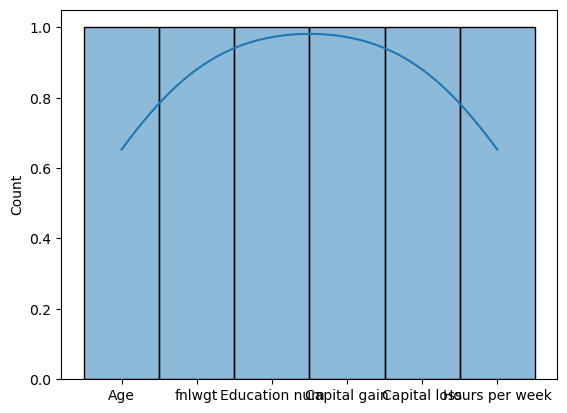

In [70]:
sns.histplot(data = numerical_columns, kde = True)

In [72]:
df_encoded=pd.get_dummies(df1,drop_first=True)
df_encoded

,Age,fnlwgt,Education num,Capital gain,Capital loss,Hours per week,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Never-worked,Work Class_ Private,...,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Income_ >50K
0,39,77516,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12.0,0,0,38.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,40,154374,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
32558,58,151910,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32559,22,201490,9.0,0,0,32.5,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [74]:
corr_matrix=df_encoded.corr()
corr_matrix

,Age,fnlwgt,Education num,Capital gain,Capital loss,Hours per week,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Never-worked,Work Class_ Private,...,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia,Income_ >50K
Age,1.000000,-0.077372,0.047207,NaN,NaN,0.091254,0.051706,0.061192,-0.019454,-0.198950,...,0.008080,0.002636,0.000163,-0.013826,-0.006265,0.004920,0.016118,-0.015060,0.000420,0.235865
fnlwgt,-0.077372,1.000000,-0.039574,NaN,NaN,-0.025518,-0.008762,-0.001246,0.005015,0.043206,...,0.008504,-0.003610,-0.012180,-0.000900,-0.000658,0.002719,-0.078062,-0.011239,0.004730,-0.008387
Education num,0.047207,-0.039574,1.000000,NaN,NaN,0.184738,0.060389,0.100410,-0.015645,-0.121099,...,-0.038825,0.000981,0.016029,0.051041,0.007841,-0.017249,0.077097,-0.006290,-0.001402,0.342274
Capital gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capital loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Native Country_ Trinadad&Tobago,0.004920,0.002719,-0.017249,NaN,NaN,-0.004388,-0.004212,-0.001148,-0.000354,0.002093,...,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-0.001097,-0.000536,-0.007660
Native Country_ United-States,0.016118,-0.078062,0.077097,NaN,NaN,0.017081,0.015441,0.033196,0.005000,-0.043184,...,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-0.133180,-0.065031,0.034470
Native Country_ Vietnam,-0.015060,-0.011239,-0.006290,NaN,NaN,-0.013919,0.000099,-0.003611,-0.000666,0.009290,...,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000,-0.001007,-0.017649
Native Country_ Yugoslavia,0.000420,0.004730,-0.001402,NaN,NaN,0.007338,-0.003865,-0.000161,-0.000325,0.005571,...,-0.001314,-0.000426,-0.001100,-0.000878,-0.000521,-0.000536,-0.065031,-0.001007,1.000000,0.006959


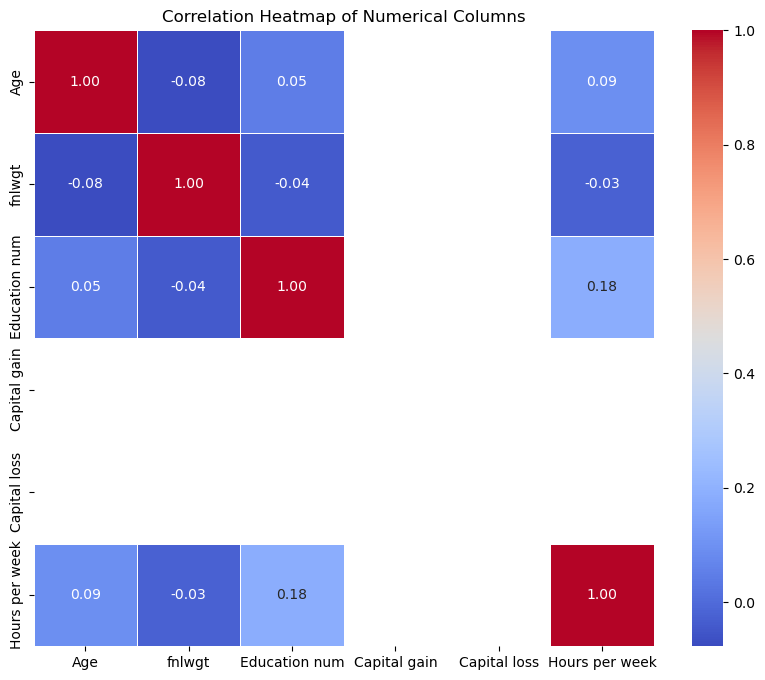

In [76]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [78]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Handle missing values in categorical columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

# Encode categorical columns using one-hot encoding (example)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show a summary of the new encoded dataset
print("Shape of encoded dataset:", df_encoded.shape)
print(df_encoded.head())

Categorical columns: ['Work Class', 'Education', 'Marital status', 'Occupation', 'Relationsip', 'Race', 'Sex', 'Native Country', 'Income']
Shape of encoded dataset: (32561, 101)
   Age  fnlwgt  Education num  Capital gain  Capital loss  Hours per week  \
0   39   77516           13.0             0             0            40.0   
1   50   83311           13.0             0             0            32.5   
2   38  215646            9.0             0             0            40.0   
3   53  234721            7.0             0             0            40.0   
4   28  338409           13.0             0             0            40.0   

   Work Class_ Federal-gov  Work Class_ Local-gov  Work Class_ Never-worked  \
0                    False                  False                     False   
1                    False                  False                     False   
2                    False                  False                     False   
3                    False                 

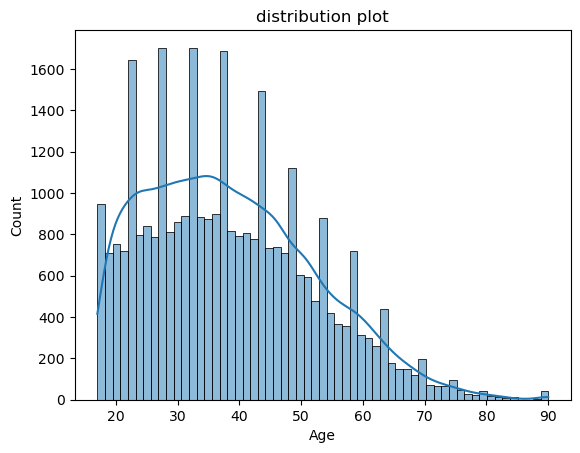

In [82]:
sns.histplot(data=data,x=data.Age,kde=True)
plt.title('distribution plot')
plt.show()

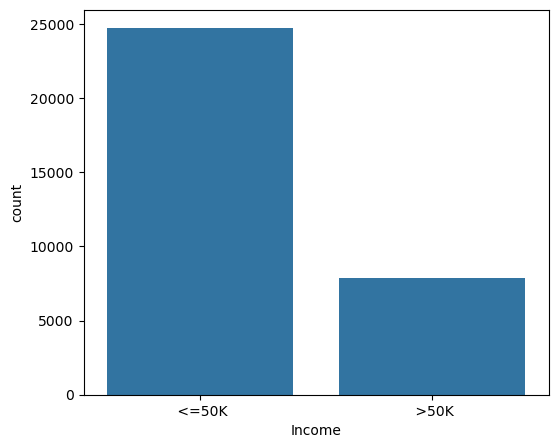

In [84]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Income',data=data)
plt.show()

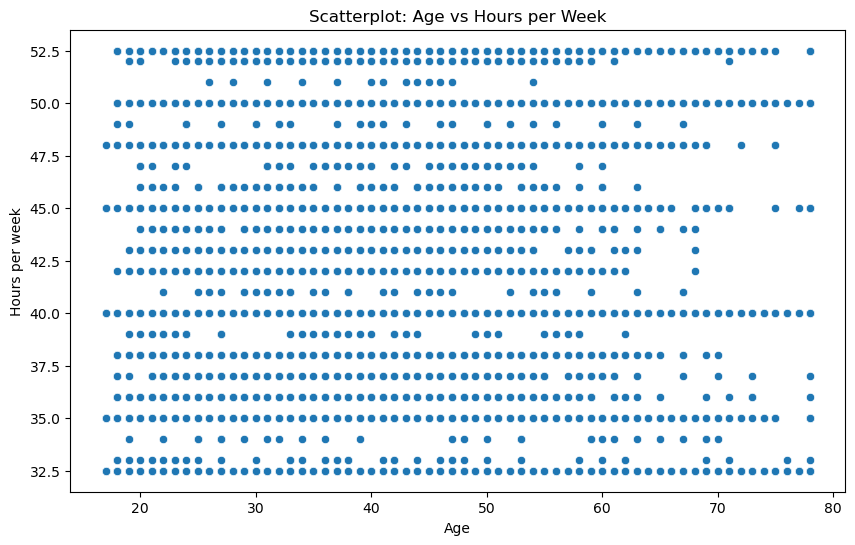

In [90]:
# Scatter plot of age vs hours-per-week


plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Hours per week', data=df_encoded)
plt.title("Scatterplot: Age vs Hours per Week")
plt.show()

In [92]:
from scipy.stats import kurtosis
for col in numerical_columns:
    kurtosis_value = kurtosis(data[col].dropna(), fisher=True)  
    
    # Drop NaN values for accurate calculation
    print(f'Kurtosis of {col}: {kurtosis_value:.4f}')

Kurtosis of Age: -0.1663
Kurtosis of fnlwgt: 6.2177
Kurtosis of Education num: 0.6232
Kurtosis of Capital gain: 154.7755
Kurtosis of Capital loss: 20.3735
Kurtosis of Hours per week: 2.9161


Unique Target variable

In [97]:
target_value=df['Income'].value_counts()     #WE GOT TARGET VALUE IS IMBALANCED(Y VALUE DOING OVER SAMPLING)
target_value

Income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [99]:
from imblearn.over_sampling import SMOTE

In [101]:
smote=SMOTE(random_state=42)


In [105]:
X = data.drop('Income', axis = 1)
y = data['Income']


In [108]:
X

,Age,Work Class,fnlwgt,Education,Education num,Marital status,Occupation,Relationsip,Race,Sex,Capital gain,Capital loss,Hours per week,Native Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [110]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32561, dtype: object

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply to all categorical columns
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # Use same encoder

In [116]:
X_train_resambled,y_train_resambled=smote.fit_resample(X_train,y_train)

In [118]:
print(X_train_resambled.shape)
print(y_train_resambled.shape)

(39556, 14)
(39556,)


In [120]:
target_value_resambled=y_train_resambled.value_counts()     
target_value_resambled

Income
>50K     19778
<=50K    19778
Name: count, dtype: int64

In [122]:
y_test.shape

(6513,)

In [124]:
# Select top 5 features
feature_selector = SelectKBest(chi2, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

In [126]:
# Get selected feature names
selected_features = X_train.columns[feature_selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'fnlwgt', 'Capital gain', 'Capital loss', 'Hours per week'], dtype='object')


In [128]:
# Step 3: Scaling (on Selected Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [130]:
# Final Training and Testing Sets
print("Final Training Set Shape:", X_train_scaled.shape)
print("Final Testing Set Shape:", X_test_scaled.shape)

Final Training Set Shape: (26048, 5)
Final Testing Set Shape: (6513, 5)


MinMax Scaling
MinMax Scaling is a normalization technique that transforms features by scaling them to a specific range, typically [0, 1]. It ensures all features have the same scale, which can improve the performance of certain machine learning algorithms.

When to Use MinMax Scaling
Works best for algorithms sensitive to feature magnitude, such as:
K-Nearest Neighbors (KNN)

Support Vector Machines (SVM)

Principal Component Analysis (PCA)

Neural Network

Not needed for tree-based algorithms (e.g., Decision Trees, Random Forests).

In [133]:
 #Apply MinMax Scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled dataset
print(df.head())

        Age         Work Class    fnlwgt   Education  Education num  \
0  0.360656          State-gov  0.161622   Bachelors       0.739130   
1  0.540984   Self-emp-not-inc  0.175980   Bachelors       0.739130   
2  0.344262            Private  0.503865     HS-grad       0.391304   
3  0.590164            Private  0.551127        11th       0.217391   
4  0.180328            Private  0.808034   Bachelors       0.739130   

        Marital status          Occupation     Relationsip    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital gain  Capital loss  Hours per week  Native Country  Income  
0           0.0           

Step 4: Model Training
1 Algorithm:
Classification: Logistic Regression, Random Forest, Support Vector Machine (SVM), Gradient Boosting,Decision Tree etc.

2 Train the Model:
Fit the selected algorithm to your training data.

In [136]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}

In [138]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

Step 5: Model Evaluation
1> Make Predictions:
Once the model is trained, you can make predictions on the test data.

2> Evaluate the Model:
Accuracy (for classification)

Precision, Recall, F1-Score (especially for imbalanced data)

ROC-AUC, PR-AUC (for binary classification)

MSE, RMSE (for regression)

In [141]:
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
results[name] = accuracy
print(f"Model: {name}")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model: Support Vector Machine
Accuracy: 0.7957930293259634
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      4942
        >50K       0.98      0.16      0.27      1571

    accuracy                           0.80      6513
   macro avg       0.89      0.58      0.58      6513
weighted avg       0.84      0.80      0.73      6513



In [142]:
results = pd.DataFrame({
    'Model': [models],
    'Accuracy': [accuracy]
})

In [146]:
results = results.sort_values(by='Accuracy', ascending=False)

print(results)

                                               Model  Accuracy
0  {'Random Forest': (DecisionTreeClassifier(max_...  0.795793


In [148]:
best_model_name = results['Model'].iloc[0]
best_accuracy = results['Accuracy'].iloc[0]

In [150]:
best_model_name

{'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Support Vector Machine': SVC(random_state=42)}

In [152]:
best_accuracy

0.7957930293259634

Step 6: Model Tunning
HYPERPARAMETER TUNNING WITH SVC
Hyperparameter tuning helps optimize model performance by selecting the best parameters. For SVC (Support Vector Classifier), key hyperparameters include:
C (Regularization): Controls the trade-off between margin size and misclassification.

Gamma (for 'rbf' and 'poly' kernels): Determines the influence of a single training example.

Kernel: Defines the transformation of input space (e.g., 'linear', 'rbf', 'poly', 'sigmoid')

In [155]:
_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [157]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel types
}

In [159]:
# Create an SVC model
svc = SVC()

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, verbose=1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and cross-validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8121929699427325


In [160]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [161]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = accuracy * 100

# Print the accuracy
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 79.58%


In [162]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = accuracy * 100

# Print the accuracy
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 79.58%


Pipeline Overview
A pipeline sequentially applies transformations and a final estimator to your data.